In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold
import warnings
from tqdm import tqdm_notebook
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV 

In [3]:
train=pd.read_csv('../input/tabular-playground-series-jun-2021/train.csv')
test=pd.read_csv('../input/tabular-playground-series-jun-2021/test.csv')
subm=pd.read_csv('../input/tabular-playground-series-jun-2021/sample_submission.csv')

train.drop('id',axis=1,inplace=True)


In [4]:
print('Number of train samples %d'%train.shape[0])
print('Number of train fetures %d'%train.shape[1])
print('Number of test samples %d'%test.shape[0])
print('Number of test fetures %d'%test.shape[1])

Number of train samples 200000
Number of train fetures 76
Number of test samples 100000
Number of test fetures 76


In [5]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,...,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,...,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


<AxesSubplot:>

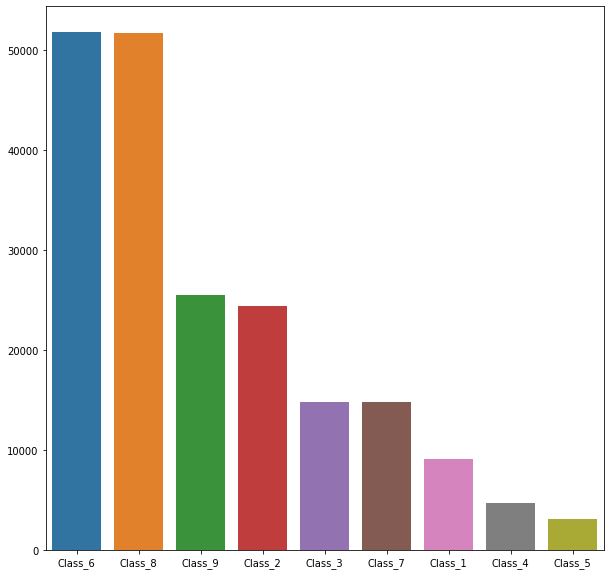

In [6]:
target_values = train['target'].value_counts().to_frame().T
plt.figure(figsize = (10,10))
sns.barplot(x = target_values.columns,y = target_values.values.reshape(-1,))

In [15]:
n_folds=5
from xgboost import XGBClassifier
import xgboost as xgb

In [16]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [17]:
xgb_param = xgb1.get_xgb_params()

In [21]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,...,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,...,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


# XGBoost

In [37]:


x_train ,y_train = train.drop(['target'], axis=1), train.target

params_grid = {'max_depth': [3, 6, 9], 'learning_rate': [0.1, 0.3], 'colsample_bytree': [0.6, 0.8, 1]}
# params_grid2 = {'learning_rate': [0.1]}

xgb_estimator = XGBClassifier(n_estimators = 1000)
xgb_gsearch = GridSearchCV(xgb_estimator, param_grid=params_grid)

xgb_results = xgb_gsearch.fit(x_train, y_train)
xgb_results.best_estimator_.get_xgb_params()


    
    
    

[12:37:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

{'objective': 'multi:softprob',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# CatBoost

In [40]:
import catboost
from catboost import CatBoostClassifier

param_grid = {
    "learning_rate": [0.001, 0.01, 0.5],
}

clf = CatBoostClassifier(
    iterations=1000, 
    verbose=20
)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)
catresults = grid_search.fit(x_train[:100], y_train[:100])
catresults.best_estimator_.get_params()

0:	learn: 2.0791382	total: 3.33ms	remaining: 3.33s
20:	learn: 2.0720227	total: 59.4ms	remaining: 2.77s
40:	learn: 2.0647319	total: 115ms	remaining: 2.69s
60:	learn: 2.0574485	total: 174ms	remaining: 2.68s
80:	learn: 2.0500551	total: 232ms	remaining: 2.63s
100:	learn: 2.0434232	total: 287ms	remaining: 2.55s
120:	learn: 2.0362509	total: 345ms	remaining: 2.5s
140:	learn: 2.0293129	total: 400ms	remaining: 2.44s
160:	learn: 2.0221619	total: 466ms	remaining: 2.43s
180:	learn: 2.0154515	total: 522ms	remaining: 2.36s
200:	learn: 2.0086657	total: 581ms	remaining: 2.31s
220:	learn: 2.0020583	total: 640ms	remaining: 2.26s
240:	learn: 1.9955821	total: 699ms	remaining: 2.2s
260:	learn: 1.9890357	total: 756ms	remaining: 2.14s
280:	learn: 1.9826560	total: 815ms	remaining: 2.08s
300:	learn: 1.9760750	total: 873ms	remaining: 2.03s
320:	learn: 1.9698254	total: 935ms	remaining: 1.98s
340:	learn: 1.9632190	total: 993ms	remaining: 1.92s
360:	learn: 1.9569215	total: 1.05s	remaining: 1.86s
380:	learn: 1.9507

{'iterations': 1000, 'learning_rate': 0.5, 'verbose': 20}